ABB-HackFest

* [Shareable Colab Link](https://colab.research.google.com/drive/1s4dtYvv_G3rV5ogJ9fMRsTv9OBCp6ufd?usp=sharing)


## How to run this notebook

* Goto **Runtime** and select **Run All**
  - Will take almost 2-5 mins depending on your internet speed.
  - When execution is completed it show *0s completed* at the bottom.
* Now unhide all cells to see all output
  - Select **Edit** then **Select All Cells** option
  - It will select all cells as a result everything is now higlighted.
  - Select **View** and click on **Expand all sections**
* Now everything is done.


#### Extras:
* Using college email ID for colab, results in extra memory and better runtime
* If seeing third party cookies error, don't worry it's nothing, if you wish enable third party cookies for colab.
* Any other issues email me at (aryan.2023y@gmail.com)

### Task Done
* Convert the data files to csv.
* [x] Cleaning of Data
	- [x] Shape of Data
	- [x] Check for NAs
	- [x] Date format
	- [x] Check Data Info
* [x] Country-wise monthly sales analysis.
* [x] Yearly-sales revenue generated Country-wise.
* [x] Predicted Dataset Generation

## NOTE: Plotly Generated Graphs is NOT supported in HTML format.
## Please prefer using the given colab link. (Linux cmds AHEAD :p)

Cloning github repository with data in it.

In [ ]:
!rm -r abb-hackfest/
!git clone https://github.com/aa-ryan/abb-hackfest

rm: cannot remove 'abb-hackfest/': No such file or directory
Cloning into 'abb-hackfest'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 3), reused 18 (delta 2), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
%pip install plotly
%pip install nbformat
%pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd		
import csv		
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np					
import matplotlib.pyplot as plt		 
import tensorflow as tf				 
from tensorflow import keras	
import calendar
import datetime as dt
import prophet as Prophet

In [ ]:
data = pd.read_csv('abb-hackfest/data.csv')
data.head()
print(list(data.columns))

['Country', 'Date', 'Value']


Converting each column to list for better usability.

#### Check NA values
* None Found

In [ ]:
print(data.isnull().sum())

Country    0
Date       0
Value      0
dtype: int64


##### Seperate Year and Month from Date and convert month from integer to name
##### Convert Date - string to DateTime
##### Value from String to Integer

In [ ]:
data[['Year','Month']] = data.Date.str.split('-',expand=True)
data['Month'] = data['Month'].apply(lambda x: calendar.month_name[int(x)])
data['Value'] = data['Value'].str.replace(',','').astype(int)

In [ ]:
#data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m').dt.to_period('m')
print(data.dtypes)
data

Country    object
Date       object
Value       int64
Year       object
Month      object
dtype: object


,Country,Date,Value,Year,Month
0,Canada,2019-01,2215572,2019,January
1,Canada,2019-02,2090147,2019,February
2,Canada,2019-03,6633213,2019,March
3,Canada,2019-04,2067832,2019,April
4,Canada,2019-05,2317593,2019,May
...,...,...,...,...,...
195,USA,2021-12,20207040,2021,December
196,USA,2022-01,24004887,2022,January
197,USA,2022-02,25507001,2022,February
198,USA,2022-03,35164285,2022,March


#### Data Visualisation

#### Country Wise Monthly Sales Analysis

In [ ]:
value_order_canada = data[data['Country']=='Canada']
value_order_canada_2019 = value_order_canada[value_order_canada['Year'] == '2019']
value_order_canada_2020 = value_order_canada[value_order_canada['Year'] == '2020']
value_order_canada_2021 = value_order_canada[value_order_canada['Year'] == '2021']
value_order_canada_2022 = value_order_canada[value_order_canada['Year'] == '2022']


#print(value_order_canada_2019)

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2019',
    y = value_order_canada_2019['Value'],
    x = value_order_canada_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2020',
    y = value_order_canada_2020['Value'],
    x = value_order_canada_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2021',
    y = value_order_canada_2021['Value'],
    x = value_order_canada_2021['Month'],
    connectgaps = True
))


fig.add_trace(go.Scatter(
    name='2022',
    y = value_order_canada_2022['Value'],
    x = value_order_canada_2022['Month'],
    connectgaps = True
))


fig.update_layout(title_text='Monthly Value Sold CANADA',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()

In [ ]:
value_order_china = data[data['Country']=='China']
value_order_china_2019 = value_order_china[value_order_china['Year'] == '2019']
value_order_china_2020 = value_order_china[value_order_china['Year'] == '2020']
value_order_china_2021 = value_order_china[value_order_china['Year'] == '2021']
value_order_china_2022 = value_order_china[value_order_china['Year'] == '2022']


#print(value_order_canada_2019)

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2019',
    y = value_order_china_2019['Value'],
    x = value_order_china_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2020',
    y = value_order_china_2020['Value'],
    x = value_order_china_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2021',
    y = value_order_china_2021['Value'],
    x = value_order_china_2021['Month'],
    connectgaps = True
))


fig.add_trace(go.Scatter(
    name='2022',
    y = value_order_china_2022['Value'],
    x = value_order_china_2022['Month'],
    connectgaps = True
))


fig.update_layout(title_text='Monthly Value Sold CHINA',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()

In [ ]:
value_order_Germany = data[data['Country']=='Germany']
value_order_Germany_2019 = value_order_Germany[value_order_Germany['Year'] == '2019']
value_order_Germany_2020 = value_order_Germany[value_order_Germany['Year'] == '2020']
value_order_Germany_2021 = value_order_Germany[value_order_Germany['Year'] == '2021']
value_order_Germany_2022 = value_order_Germany[value_order_Germany['Year'] == '2022']


#print(value_order_Germany_2019)

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2019',
    y = value_order_Germany_2019['Value'],
    x = value_order_Germany_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2020',
    y = value_order_Germany_2020['Value'],
    x = value_order_Germany_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2021',
    y = value_order_Germany_2021['Value'],
    x = value_order_Germany_2021['Month'],
    connectgaps = True
))


fig.add_trace(go.Scatter(
    name='2022',
    y = value_order_Germany_2022['Value'],
    x = value_order_Germany_2022['Month'],
    connectgaps = True
))


fig.update_layout(title_text='Monthly Value Sold Germany',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


In [ ]:
value_order_Italy = data[data['Country']=='Italy']
value_order_Italy_2019 = value_order_Italy[value_order_Italy['Year'] == '2019']
value_order_Italy_2020 = value_order_Italy[value_order_Italy['Year'] == '2020']
value_order_Italy_2021 = value_order_Italy[value_order_Italy['Year'] == '2021']
value_order_Italy_2022 = value_order_Italy[value_order_Italy['Year'] == '2022']


#print(value_order_Italy_2019)

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2019',
    y = value_order_Italy_2019['Value'],
    x = value_order_Italy_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2020',
    y = value_order_Italy_2020['Value'],
    x = value_order_Italy_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2021',
    y = value_order_Italy_2021['Value'],
    x = value_order_Italy_2021['Month'],
    connectgaps = True
))


fig.add_trace(go.Scatter(
    name='2022',
    y = value_order_Italy_2022['Value'],
    x = value_order_Italy_2022['Month'],
    connectgaps = True
))


fig.update_layout(title_text='Monthly Value Sold ITALY',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


In [ ]:
value_order_USA = data[data['Country']=='USA']
value_order_USA_2019 = value_order_USA[value_order_USA['Year'] == '2019']
value_order_USA_2020 = value_order_USA[value_order_USA['Year'] == '2020']
value_order_USA_2021 = value_order_USA[value_order_USA['Year'] == '2021']
value_order_USA_2022 = value_order_USA[value_order_USA['Year'] == '2022']


#print(value_order_USA_2019)

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2019',
    y = value_order_USA_2019['Value'],
    x = value_order_USA_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2020',
    y = value_order_USA_2020['Value'],
    x = value_order_USA_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='2021',
    y = value_order_USA_2021['Value'],
    x = value_order_USA_2021['Month'],
    connectgaps = True
))


fig.add_trace(go.Scatter(
    name='2022',
    y = value_order_USA_2022['Value'],
    x = value_order_USA_2022['Month'],
    connectgaps = True
))


fig.update_layout(title_text='Monthly Value Sold USA',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


#### Year Wise Country Sales Value

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name='Canada',
    y = value_order_canada_2019['Value'],
    x = value_order_canada_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='China',
    y = value_order_china_2019['Value'],
    x = value_order_china_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Germany',
    y = value_order_Germany_2019['Value'],
    x = value_order_Germany_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Italy',
    y = value_order_Italy_2019['Value'],
    x = value_order_Italy_2019['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='USA',
    y = value_order_USA_2019['Value'],
    x = value_order_USA_2019['Month'],
    connectgaps = True
))

fig.update_layout(title_text='Revenue Generated Year 2019',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name='Canada',
    y = value_order_canada_2020['Value'],
    x = value_order_canada_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='China',
    y = value_order_china_2020['Value'],
    x = value_order_china_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Germany',
    y = value_order_Germany_2020['Value'],
    x = value_order_Germany_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Italy',
    y = value_order_Italy_2020['Value'],
    x = value_order_Italy_2020['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='USA',
    y = value_order_USA_2020['Value'],
    x = value_order_USA_2020['Month'],
    connectgaps = True
))

fig.update_layout(title_text='Revenue Generated Year 2020',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name='Canada',
    y = value_order_canada_2021['Value'],
    x = value_order_canada_2021['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='China',
    y = value_order_china_2021['Value'],
    x = value_order_china_2021['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Germany',
    y = value_order_Germany_2021['Value'],
    x = value_order_Germany_2021['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Italy',
    y = value_order_Italy_2021['Value'],
    x = value_order_Italy_2021['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='USA',
    y = value_order_USA_2021['Value'],
    x = value_order_USA_2021['Month'],
    connectgaps = True
))

fig.update_layout(title_text='Revenue Generated Year 2021',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name='Canada',
    y = value_order_canada_2022['Value'],
    x = value_order_canada_2022['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='China',
    y = value_order_china_2022['Value'],
    x = value_order_china_2022['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Germany',
    y = value_order_Germany_2022['Value'],
    x = value_order_Germany_2022['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='Italy',
    y = value_order_Italy_2022['Value'],
    x = value_order_Italy_2022['Month'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name='USA',
    y = value_order_USA_2022['Value'],
    x = value_order_USA_2022['Month'],
    connectgaps = True
))

fig.update_layout(title_text='Revenue Generated Year 2022',
                 template='plotly_dark')
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Value')

fig.show()


In [ ]:
data.head()

,Country,Date,Value,Year,Month
0,Canada,2019-01,2215572,2019,January
1,Canada,2019-02,2090147,2019,February
2,Canada,2019-03,6633213,2019,March
3,Canada,2019-04,2067832,2019,April
4,Canada,2019-05,2317593,2019,May


# Prediction Making

#### Creating a Pivot Table

In [ ]:
pivot_table = data.pivot_table('Value', ['Date'], 'Country')
new_df = pivot_table.reset_index()
new_df.head()

Country,Date,Canada,China,Germany,Italy,USA
0,2019-01,2215572,6788150,37362308,3405980,27164330
1,2019-02,2090147,2946703,23448750,6455787,24954358
2,2019-03,6633213,10384100,41479346,4865427,25969581
3,2019-04,2067832,6349900,26591458,1503276,30632227
4,2019-05,2317593,6910464,21957328,2867991,32710666


In [ ]:
canada_df = pd.DataFrame([new_df.Date, new_df.Canada]).transpose()
china_df = pd.DataFrame([new_df.Date, new_df.China]).transpose()
germany_df = pd.DataFrame([new_df.Date, new_df.Germany]).transpose()
italy_df = pd.DataFrame([new_df.Date, new_df.Italy]).transpose()
usa_df = pd.DataFrame([new_df.Date, new_df.USA]).transpose()

canada_df.columns = ['ds', 'y']
canada_df['y'] = pd.to_numeric(canada_df['y'])
canada_df['ds'] = pd.to_datetime(canada_df['ds'])


china_df.columns = ['ds', 'y']
china_df['y'] = pd.to_numeric(china_df['y'])
china_df['ds'] = pd.to_datetime(china_df['ds'])

germany_df.columns = ['ds', 'y']
germany_df['y'] = pd.to_numeric(germany_df['y'])
germany_df['ds'] = pd.to_datetime(germany_df['ds'])


italy_df.columns = ['ds', 'y']
italy_df['y'] = pd.to_numeric(italy_df['y'])
italy_df['ds'] = pd.to_datetime(italy_df['ds'])


usa_df.columns = ['ds', 'y']
usa_df['y'] = pd.to_numeric(usa_df['y'])
usa_df['ds'] = pd.to_datetime(usa_df['ds'])
#print(canada_df.dtypes)

## Insample Prediction
* A dataframe with sample data dates

In [ ]:
future = list()
for i in range(1, 13):
  date = '2019-%02d'%i
  future.append([date])
for i in range(1, 13):
  date = '2020-%02d'%i
  future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])


##### Insample Prediction for Canada

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/pxl840mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/gxpr9snf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25198', 'data', 'file=/tmp/tmpnk9ytd1v/pxl840mi.json', 'init=/tmp/tmpnk9ytd1v/gxpr9snf.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_model29hjndyw/prophet_model-20221127152227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


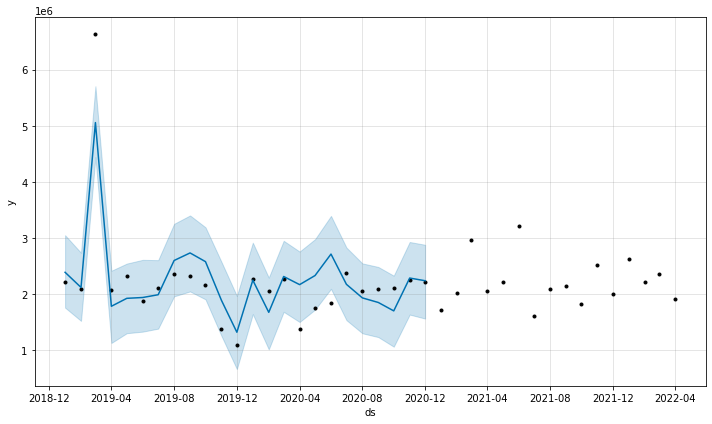

In [ ]:
p_canada = Prophet.Prophet()
model_canada = p_canada.fit(canada_df)
canada_forecast = model_canada.predict(future)
model_canada.plot(canada_forecast)
plt.show()

##### Insample Prediction for China




INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/ug9vukon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/k5f14dht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17212', 'data', 'file=/tmp/tmpnk9ytd1v/ug9vukon.json', 'init=/tmp/tmpnk9ytd1v/k5f14dht.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelh185b5kx/prophet_model-20221127152228.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


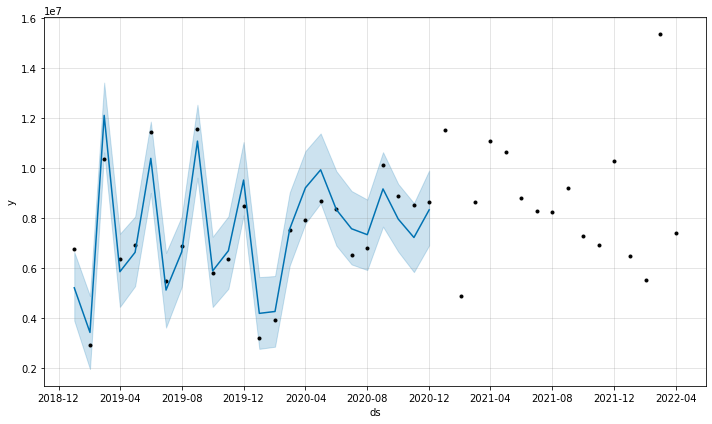

In [ ]:
p_china = Prophet.Prophet()
model_china = p_china.fit(china_df)
china_forecast = model_china.predict(future)
model_china.plot(china_forecast)
plt.show()

##### Insample Prediction for Germany

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/as58g55j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/9rg1z0pm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60203', 'data', 'file=/tmp/tmpnk9ytd1v/as58g55j.json', 'init=/tmp/tmpnk9ytd1v/9rg1z0pm.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modeltha63iz2/prophet_model-20221127152229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


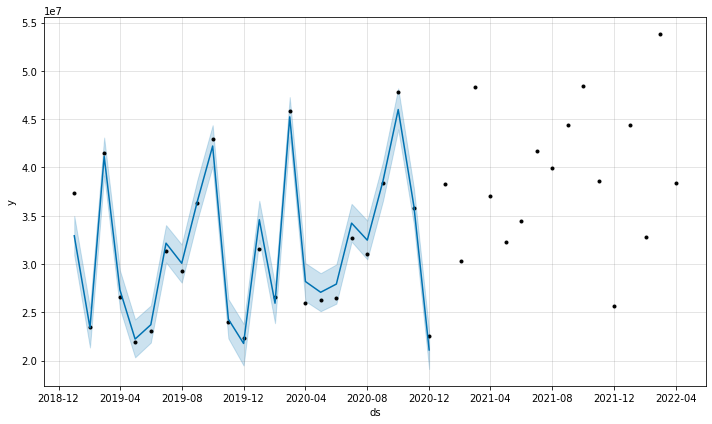

In [ ]:
p_germany = Prophet.Prophet()
model_germany = p_germany.fit(germany_df)
germany_forecast = model_germany.predict(future)
model_germany.plot(germany_forecast)
plt.show()


##### Insample Prediction for Italy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/7xlq0vmy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/g704t4fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84653', 'data', 'file=/tmp/tmpnk9ytd1v/7xlq0vmy.json', 'init=/tmp/tmpnk9ytd1v/g704t4fx.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_model0w3099pf/prophet_model-20221127152230.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


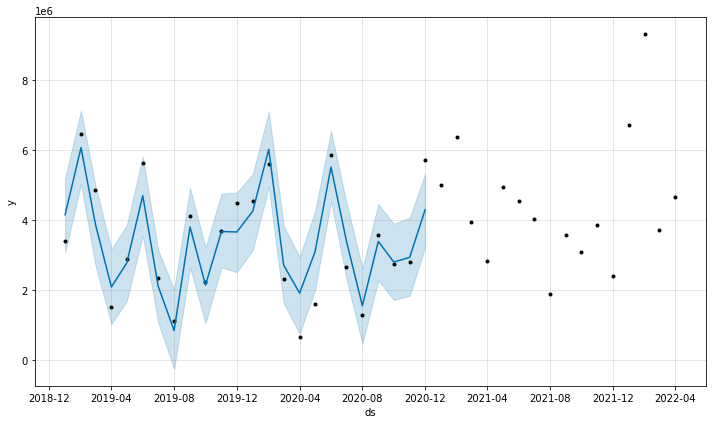

In [ ]:
p_italy = Prophet.Prophet()
model_italy = p_italy.fit(italy_df)
italy_forecast = model_italy.predict(future)
model_italy.plot(italy_forecast)
plt.show()


##### Insample Prediction for USA

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/zl6rj8kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/e2o7t11o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22358', 'data', 'file=/tmp/tmpnk9ytd1v/zl6rj8kq.json', 'init=/tmp/tmpnk9ytd1v/e2o7t11o.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelrqo3tb7v/prophet_model-20221127152231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


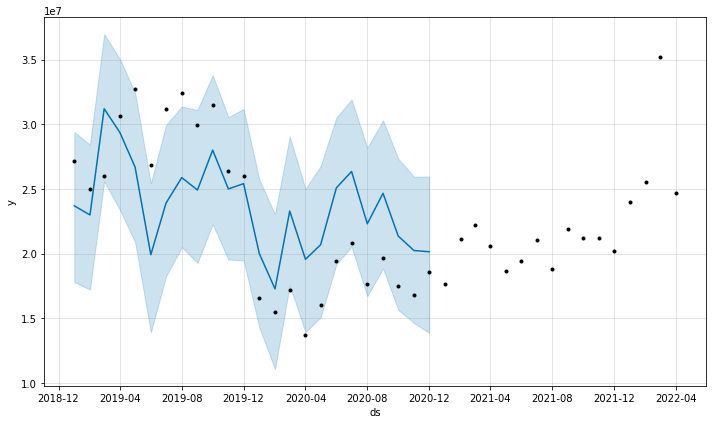

In [ ]:
p_usa = Prophet.Prophet()
model_usa = p_usa.fit(usa_df)
usa_forecast = model_usa.predict(future)
model_usa.plot(usa_forecast)
plt.show()


## Outsample Prediction

In [ ]:
future = list()
for i in range(5, 13):
  date = '2022-%02d'%i
  future.append([date])
for i in range(1, 8):
  date = '2023-%02d'%i
  future.append([date])

print(future)

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

[['2022-05'], ['2022-06'], ['2022-07'], ['2022-08'], ['2022-09'], ['2022-10'], ['2022-11'], ['2022-12'], ['2023-01'], ['2023-02'], ['2023-03'], ['2023-04'], ['2023-05'], ['2023-06'], ['2023-07']]


##### Outsample Prediction for Canada

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/rnd6wupa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/i155251b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66071', 'data', 'file=/tmp/tmpnk9ytd1v/rnd6wupa.json', 'init=/tmp/tmpnk9ytd1v/i155251b.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelwitudz4g/prophet_model-20221127152232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


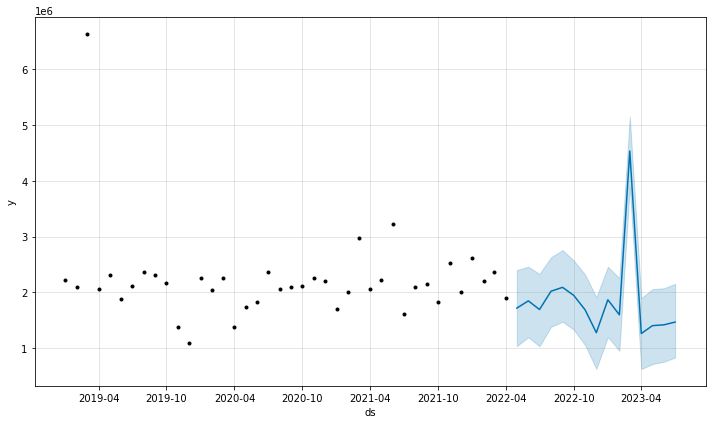

In [ ]:
pout_canada = Prophet.Prophet()
model_canada = pout_canada.fit(canada_df)
canada_forecast = model_canada.predict(future)
model_canada.plot(canada_forecast)
plt.show()

##### Outsample prediction for China

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/_3v5orsi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/sszu1856.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70502', 'data', 'file=/tmp/tmpnk9ytd1v/_3v5orsi.json', 'init=/tmp/tmpnk9ytd1v/sszu1856.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelpiq02hz2/prophet_model-20221127152233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


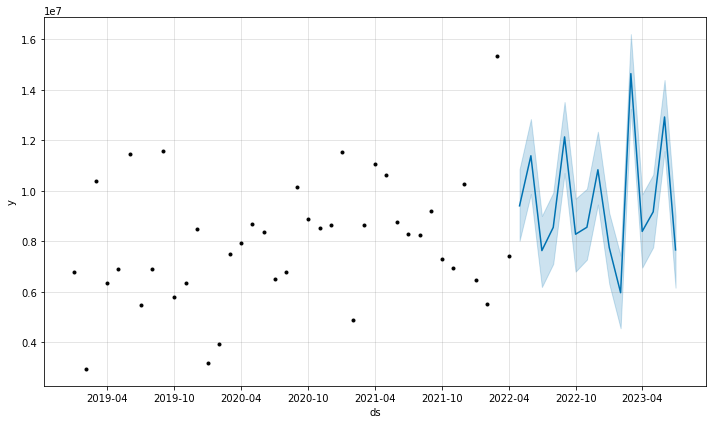

In [ ]:
pout_china = Prophet.Prophet()
model_china = pout_china.fit(china_df)
china_forecast = model_china.predict(future)
model_china.plot(china_forecast)
plt.show()

##### Outsample prediction for Germany

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/65400bxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/drk6c1qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50746', 'data', 'file=/tmp/tmpnk9ytd1v/65400bxx.json', 'init=/tmp/tmpnk9ytd1v/drk6c1qb.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_model4x9s0wbt/prophet_model-20221127152234.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


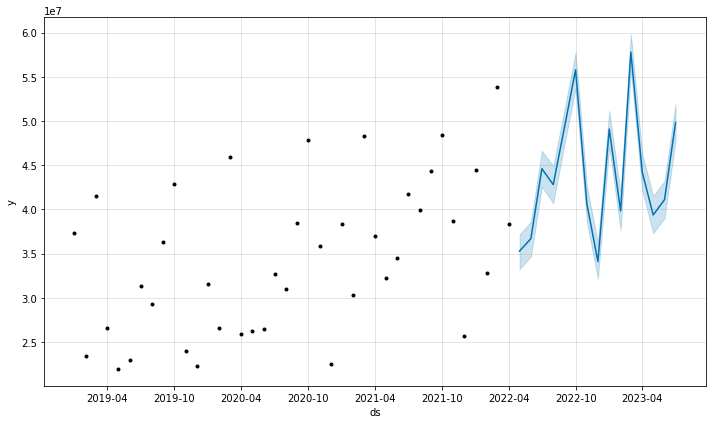

In [ ]:
pout_germany = Prophet.Prophet()
model_germany = pout_germany.fit(germany_df)
germany_forecast = model_germany.predict(future)
model_germany.plot(germany_forecast)
plt.show()


##### Outsample prediction for Italy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/vw9iryoo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/5dznva3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24285', 'data', 'file=/tmp/tmpnk9ytd1v/vw9iryoo.json', 'init=/tmp/tmpnk9ytd1v/5dznva3p.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelpbubsx34/prophet_model-20221127152235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


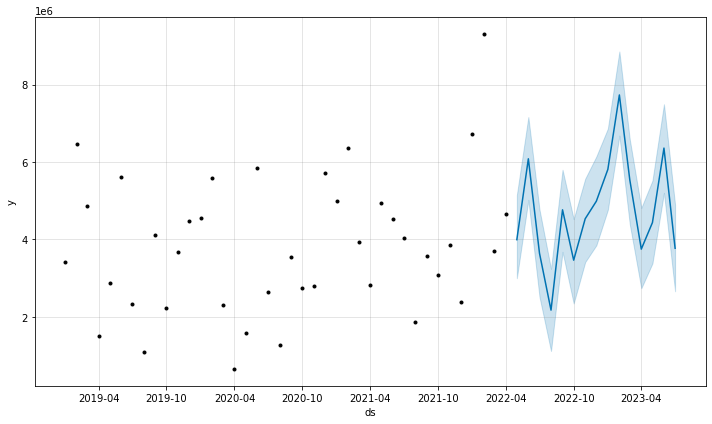

In [ ]:
pout_italy = Prophet.Prophet()
model_italy = pout_italy.fit(italy_df)
italy_forecast = model_italy.predict(future)
model_italy.plot(italy_forecast)
plt.show()

##### Outsample prediction for USA

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/ks91yj79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnk9ytd1v/zvf09mh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84103', 'data', 'file=/tmp/tmpnk9ytd1v/ks91yj79.json', 'init=/tmp/tmpnk9ytd1v/zvf09mh5.json', 'output', 'file=/tmp/tmpnk9ytd1v/prophet_modelvz5mw6fs/prophet_model-20221127152235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


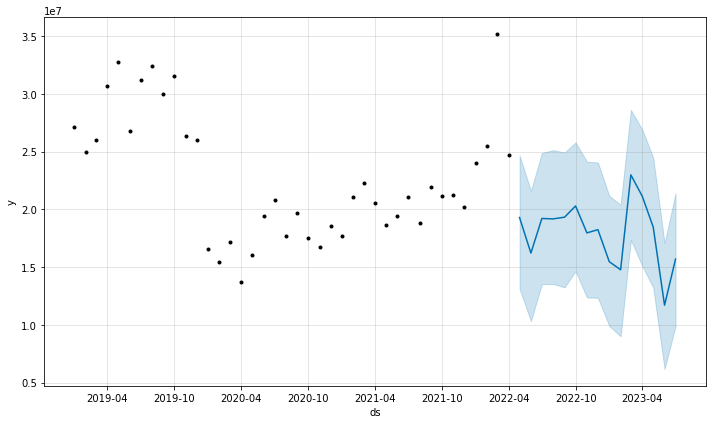

In [ ]:
pout_usa = Prophet.Prophet()
model_usa = pout_usa.fit(usa_df)
usa_forecast = model_usa.predict(future)
model_usa.plot(usa_forecast)
plt.show()

## Evaluation of Model

In [ ]:
from sklearn.metrics import mean_squared_log_error

#### Canada

RMSLE: 0.18556062230205417


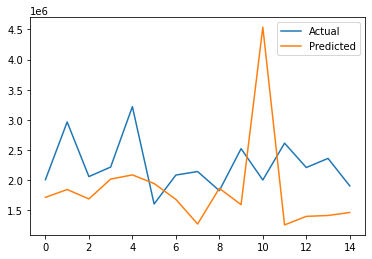

In [ ]:
#print(canada_df)

## Calculation of RMSLE between expected and predicted value
y_true = canada_df['y'][-15:].values
y_pred = canada_forecast['yhat'].values
#print(y_true.shape, y_pred.shape)
rmsle = mean_squared_log_error(y_true, y_pred)

print("RMSLE: {}".format(rmsle) )
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


(15,) (15,)
RMSLE: 0.08855656425263261


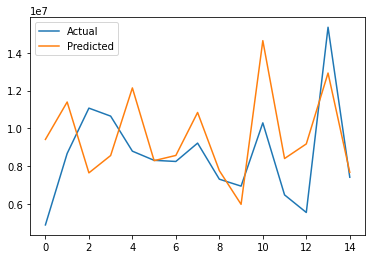

In [ ]:
## Calculation of RMSLE between expected and predicted value
y_true = china_df['y'][-15:].values
y_pred = china_forecast['yhat'].values
print(y_true.shape, y_pred.shape)
rmsle = mean_squared_log_error(y_true, y_pred)

print("RMSLE: {}".format(rmsle) )
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

(15,) (15,)
RMSLE: 0.08850648257862732


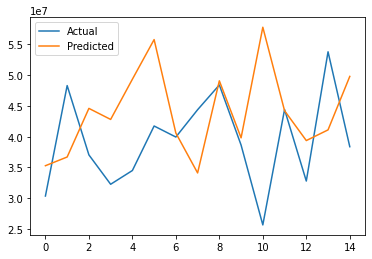

In [ ]:
## Calculation of RMSLE between expected and predicted value
y_true = germany_df['y'][-15:].values
y_pred = germany_forecast['yhat'].values
print(y_true.shape, y_pred.shape)
rmsle = mean_squared_log_error(y_true, y_pred)

print("RMSLE: {}".format(rmsle) )
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

(15,) (15,)
RMSLE: 0.3258658342836568


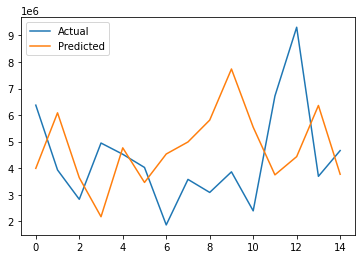

In [ ]:
## Calculation of RMSLE between expected and predicted value
y_true = italy_df['y'][-15:].values
y_pred = italy_forecast['yhat'].values
print(y_true.shape, y_pred.shape)
rmsle = mean_squared_log_error(y_true, y_pred)

print("RMSLE: {}".format(rmsle) )
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

(15,) (15,)
RMSLE: 0.129013280383453


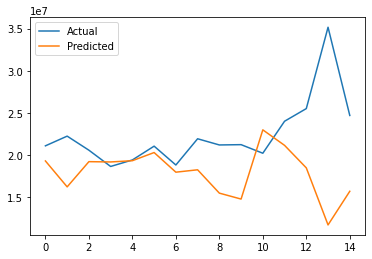

In [ ]:
## Calculation of RMSLE between expected and predicted value
y_true = usa_df['y'][-15:].values
y_pred = usa_forecast['yhat'].values
print(y_true.shape, y_pred.shape)
rmsle = mean_squared_log_error(y_true, y_pred)

print("RMSLE: {}".format(rmsle) )
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
from functools import reduce
df_list = [canada_forecast[['ds', 'yhat']], china_forecast[['ds', 'yhat']], germany_forecast[['ds', 'yhat']], italy_forecast[['ds', 'yhat']], usa_forecast[['ds', 'yhat']]]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['ds'], how='outer'), df_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'yhat_x'} in the result is deprecated and will raise a MergeError in a future version.



In [ ]:
df_merged.columns = ['Date', 'Canada', 'China', 'Germany', 'Italy', 'USA']


In [ ]:
from pandas.api.types import is_period_dtype

if not is_period_dtype(df_merged.dtypes['Date']):
  df_merged['Date'] = df_merged['Date'].dt.to_period('M')

## convert float to int
m = df_merged.select_dtypes(np.number)
df_merged[m.columns] = m.round().astype('Int64')

In [ ]:
df_merged

,Date,Canada,China,Germany,Italy,USA
0,2022-05,1717071,9411402,35288611,3994917,19290972
1,2022-06,1847119,11394118,36704457,6085226,16213312
2,2022-07,1691548,7638364,44605249,3643464,19206717
3,2022-08,2019688,8557129,42809508,2174046,19172167
4,2022-09,2089607,12140717,49343413,4766562,19320429
5,2022-10,1946539,8285965,55787326,3464936,20289179
6,2022-11,1683905,8562230,40594015,4534843,17957680
7,2022-12,1276151,10839569,34114246,4988636,18241378
8,2023-01,1866681,7755563,49084936,5811350,15470307
9,2023-02,1596642,5970709,39819685,7734966,14766072


In [ ]:
df_merged.to_csv('Aryan_DSATM_1DT19CS023_submission.csv',index=False)

In [ ]:
### Conversion to Notebook to HTML
## https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab
